# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1', index_col=0)
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the train set

In [13]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(train_x)
print(y_hat)

[1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 0.]


### Observe precision

In [14]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+train_y)==2
# False positive: if the prediction is 1, but the original data is 0, their difference is 1
false_positives = (y_hat-train_y)==1
print(true_positives.T)
print(false_positives.T)

27     True
14    False
22     True
8     False
11    False
23     True
21     True
38     True
31     True
29     True
10    False
15    False
26     True
12    False
4     False
24     True
20     True
19    False
2     False
39     True
33     True
0     False
30    False
17    False
32     True
25     True
9     False
18    False
34     True
13    False
Name: y, dtype: bool
27    False
14    False
22    False
8     False
11    False
23    False
21    False
38    False
31    False
29    False
10    False
15    False
26    False
12    False
4     False
24    False
20    False
19    False
2     False
39    False
33    False
0     False
30    False
17    False
32    False
25    False
9     False
18     True
34    False
13    False
Name: y, dtype: bool


In [15]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.04299791 0.95700209]
 [0.7670653  0.2329347 ]
 [0.06236116 0.93763884]
 [0.77799392 0.22200608]
 [0.60377749 0.39622251]
 [0.15056577 0.84943423]
 [0.06807052 0.93192948]
 [0.02071227 0.97928773]
 [0.24292107 0.75707893]
 [0.03357862 0.96642138]
 [0.97585297 0.02414703]
 [0.80005491 0.19994509]
 [0.01188305 0.98811695]
 [0.7639275  0.2360725 ]
 [0.73404761 0.26595239]
 [0.19587197 0.80412803]
 [0.01621208 0.98378792]
 [0.50013439 0.49986561]
 [0.81341707 0.18658293]
 [0.29989042 0.70010958]
 [0.18264982 0.81735018]
 [0.85818779 0.14181221]
 [0.63558272 0.36441728]
 [0.78538967 0.21461033]
 [0.01512351 0.98487649]
 [0.00670616 0.99329384]
 [0.97241177 0.02758823]
 [0.27665629 0.72334371]
 [0.08000676 0.91999324]
 [0.92569802 0.07430198]]
[ 3.10265402e+00 -1.19181375e+00  2.71042211e+00 -1.25401393e+00
 -4.21229802e-01  1.73017049e+00  2.61671288e+00  3.85609940e+00
  1.13673096e+00  3.35971036e+00 -3.69915049e+00 -1.38663756e+00
  4.42068811e+00 -1.17433391e+00 -1.01525658e+00  1.41

### 2.1 Build ROC curves

In [16]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    1    1    1    1    1    1    1    1    1    0
1     1    1    1    0    0    0    0    0    0    0    0
2     1    1    1    1    1    1    1    1    1    1    0
3     1    1    1    0    0    0    0    0    0    0    0
4     1    1    1    1    0    0    0    0    0    0    0
5     1    1    1    1    1    1    1    1    1    0    0
6     1    1    1    1    1    1    1    1    1    1    0
7     1    1    1    1    1    1    1    1    1    1    0
8     1    1    1    1    1    1    1    1    0    0    0
9     1    1    1    1    1    1    1    1    1    1    0
10    1    0    0    0    0    0    0    0    0    0    0
11    1    1    0    0    0    0    0    0    0    0    0
12    1    1    1    1    1    1    1    1    1    1    0
13    1    1    1    0    0    0    0    0    0    0    0
14    1    1    1    0    0    0    0    0    0    0    0
15    1    1    1    1    1    1    1    1    1    0    0
16    1    1  

### 3. Calculate TP and FP at each discrimination level

False positive rate at threshold 0.1:  0.7857142857142857
True positive rate at threshold 0.1:  1.0
            0
0.0  1.000000
0.1  0.785714
0.2  0.571429
0.3  0.214286
0.4  0.142857
0.5  0.071429
0.6  0.071429
0.7  0.071429
0.8  0.000000
0.9  0.000000
1.0  0.000000
          0
0.0  1.0000
0.1  1.0000
0.2  1.0000
0.3  1.0000
0.4  0.9375
0.5  0.9375
0.6  0.9375
0.7  0.9375
0.8  0.8125
0.9  0.6250
1.0  0.0000


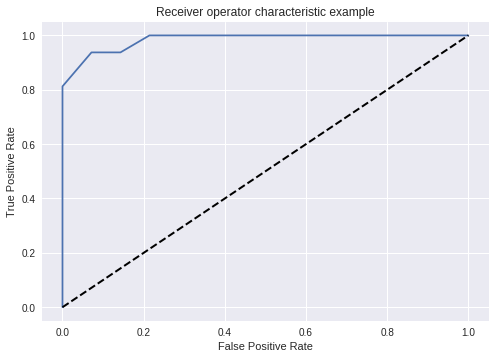

In [17]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values==1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operator characteristic example');
    

### 4. Example using sklearn

In [0]:
from sklearn import metrics

0.9843749999999999
0.9821428571428571
[0.         0.         0.07142857 0.07142857 0.21428571 0.21428571
 1.        ]
[0.0625 0.875  0.875  0.9375 0.9375 1.     1.    ]


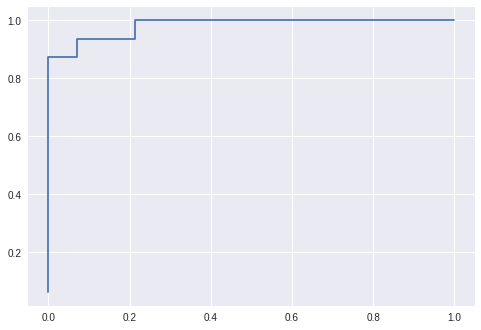

In [19]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


AUC: 0.9583333333333334


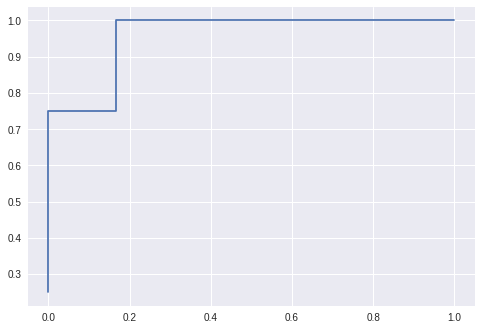

In [20]:
# Compute and plot
proba = regr.predict_proba(test_x)

fpr, tpr, _ = metrics.roc_curve(test_y.values,proba[::,1:2:])

print('AUC:', metrics.auc(fpr.T,tpr.T))

plt.plot(fpr,tpr);
    